In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#from tcn import compiled_tcn

In [2]:
dataset=pd.read_csv('SolarPrediction_aligned_Sun.csv',engine='python',nrows=576*15)
dataset=dataset.drop("Data",axis=1)
dataset=dataset.drop("Time",axis=1)
# dataset=dataset.drop("TimeSunRise",axis=1)
# dataset=dataset.drop("TimeSunSet",axis=1)
target=dataset["Radiation"]
dataset.head(5)


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,8,2.58,51,30.43,103,77.27,11.25,22020,67080
1,310,2.83,51,30.43,103,153.44,9.00,22020,67080
2,1206,2.16,51,30.43,103,142.04,7.87,22020,67080
3,1505,2.21,51,30.43,103,144.12,18.00,22020,67080
4,1809,2.25,51,30.43,103,67.42,11.25,22020,67080


In [3]:

dataset=dataset.values
target=target.values



In [4]:
dataset[:,1]=dataset[:,8]
dataset[:,8]=target[:]
#print(dataset[0,:])
# print(temp1)
# print(temp2)
#target=target.values
#target=target.values

In [5]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        #a=dataset第0行i~i+look_back個
        a=dataset[i:(i+look_back),0:8]
        dataX.append(a)
        dataY.append(dataset[i+look_back,8])
    return np.array(dataX),np.array(dataY)

    

In [6]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)- train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]


In [7]:
trainX,trainY=create_dataset(train,5)
testX,testY=create_dataset(test,5)
print("train_x: ",trainX.shape)
print("train y: ",trainY.shape)
print("testX: ",testX.shape)
print(trainX[0,:,:])
print(trainY[0])

train_x:  (5782, 5, 8)
train y:  (5782,)
testX:  (2846, 5, 8)
[[8.0000e+00 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 7.7270e+01
  1.1250e+01 2.2020e+04]
 [3.1000e+02 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.5344e+02
  9.0000e+00 2.2020e+04]
 [1.2060e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4204e+02
  7.8700e+00 2.2020e+04]
 [1.5050e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4412e+02
  1.8000e+01 2.2020e+04]
 [1.8090e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 6.7420e+01
  1.1250e+01 2.2020e+04]]
2.15


In [8]:
trainX=trainX.reshape(5782,40)
testX=testX.reshape(2846,40)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
print(trainX.shape)
print(trainX[0,:])

(5782, 40)
[8.0000e+00 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 7.7270e+01
 1.1250e+01 2.2020e+04 3.1000e+02 6.7080e+04 5.1000e+01 3.0430e+01
 1.0300e+02 1.5344e+02 9.0000e+00 2.2020e+04 1.2060e+03 6.7080e+04
 5.1000e+01 3.0430e+01 1.0300e+02 1.4204e+02 7.8700e+00 2.2020e+04
 1.5050e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4412e+02
 1.8000e+01 2.2020e+04 1.8090e+03 6.7080e+04 5.1000e+01 3.0430e+01
 1.0300e+02 6.7420e+01 1.1250e+01 2.2020e+04]


In [9]:
np.random.seed(7)


dataset=dataset.astype('float32')
target=target.astype('float32')

scalar1=MinMaxScaler(feature_range=(0,1))
scalar2=MinMaxScaler(feature_range=(0,1))
scalar3=MinMaxScaler(feature_range=(0,1))
scalar4=MinMaxScaler(feature_range=(0,1))
#scalar_dim=dataset[:,1]

#target=dataset[:,1]
trainX=scalar1.fit_transform(trainX)
testX=scalar2.fit_transform(testX)
trainY=scalar3.fit_transform(trainY)
testY=scalar4.fit_transform(testY)
#target=target.reshape(len(target),1)
# target=scalar2.fit_transform(target)


原始

In [10]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_test.shape)
# print(X_train.shape)

轉換維度以符合1D CNN的輸入要求

In [11]:
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)
# print(X_test.shape)
# print(X_train.shape)

In [12]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(trainX.shape[1], 1)))
model.add(Flatten())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
model.fit(trainX, trainY, epochs=50, batch_size=1, validation_data=(testX, testY))

Epoch 1/50
5782/5782 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0186
Epoch 2/50
3332/5782 [================>.............] - ETA: 4s - loss: 0.0108

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(testX)
train_pre=model.predict(trainX)

181/181 [==============================] - 0s 1ms/step


In [ ]:
train_pre=scalar3.inverse_transform(train_pre)
trainY=scalar3.inverse_transform(trainY)
y_pred=scalar4.inverse_transform(y_pred)
testY=scalar4.inverse_transform(testY)


In [ ]:
y_test=np.reshape(testY,(len(testY),1))
train_pre=np.reshape(train_pre,(len(train_pre),1))
print(y_test.shape)
print(y_pred.shape)
#print(y_train.shape)
print(train_pre.shape)



(2846, 1)
(2846, 1)
(5782, 1)


In [ ]:
trainScore=math.sqrt(mean_squared_error(trainY,train_pre))
print('Train Score:%.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(testY,y_pred))
print('Test Score:%.2f RMSE'%(testScore))

Train Score:129.40 RMSE
Test Score:203.03 RMSE


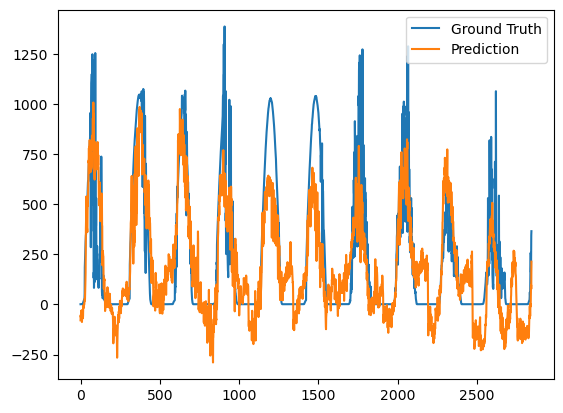

In [ ]:
plt.plot(testY,label='Ground Truth')
plt.plot(y_pred,label='Prediction')
#plt.plot(testPredictPlot[0:200],label='Prediction(testing)')
plt.legend()
plt.show()